## 1. Load Image

In [11]:
path_to_jpg_file = "my_img2.jpg" # wherever your image is
import matplotlib.image as mpimg
img = mpimg.imread(path_to_jpg_file)

In [12]:
top_row = img[0]
top_left_pixel = top_row[0]
red, green, blue = top_left_pixel

## 2. Flatten Image

In [13]:
pixels = []
for row in img:
    for pixel in row:
        pixels.append(pixel)


In [14]:
pixels[1]

array([130, 130, 130], dtype=uint8)

## 3. K-Means Clustering

In [15]:
from sklearn.cluster import KMeans

clusterer = KMeans(5)
clusterer.fit(pixels) # this might take a while

KMeans(n_clusters=5)

## 4. Reconstruct Image

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def recolor(pixel):
    cluster = clusterer.predict([pixel])[0] # index of the closest cluster
    recolored_pixel = clusterer.cluster_centers_[cluster] 
    recolored_pixel = np.clip(recolored_pixel, 0, 255)
    return recolored_pixel

new_img = np.array([[recolor(pixel) for pixel in row] for row in img])

## 5. Display Image

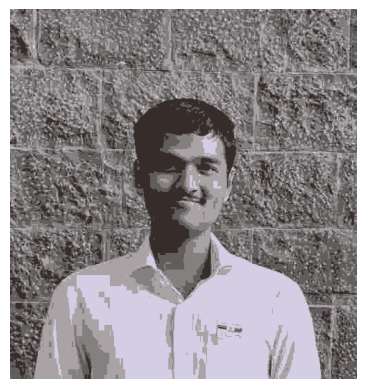

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming new_img is the final recolored image
new_img = np.array([[recolor(pixel) for pixel in row] for row in img])

# Ensure the data type is uint8 and clip values to valid range
new_img = np.clip(new_img, 0, 255).astype(np.uint8)

# Display the image without axes
plt.imshow(new_img)
plt.axis('off')
plt.show()


In [19]:
mpimg.imsave('new_img.png', new_img)